In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#loading Dataset

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#data cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe() #statistical summary of the data within a DataFrame. 

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#categorical data is a collection of information that is divided into groups.
"""
Feature engineering is a machine learning technique that leverages data to create
new variables that aren't in the training set. It can produce new features for
both supervised and unsupervised learning, with the goal of simplifying 
and speeding up data transformations while also enhancing model accuracy.
"""

#Feature Engineering 

In [20]:
male = pd.get_dummies(df['sex'],drop_first = True)

In [21]:
male

,male
0,False
1,True
2,True
3,True
4,True
...,...
1333,True
1334,False
1335,False
1336,False


In [18]:
male=pd.get_dummies(df['sex'])

In [22]:
male

,male
0,False
1,True
2,True
3,True
4,True
...,...
1333,True
1334,False
1335,False
1336,False


In [23]:
male = pd.get_dummies(df['sex'],drop_first = True)
df=pd.concat([df,male],axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,False
1,18,male,33.770,1,no,southeast,1725.55230,True
2,28,male,33.000,3,no,southeast,4449.46200,True
3,33,male,22.705,0,no,northwest,21984.47061,True
4,32,male,28.880,0,no,northwest,3866.85520,True


In [24]:
Smoker = pd.get_dummies(df['smoker'],drop_first = True)
df=pd.concat([df,Smoker],axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False


In [25]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

#Exploratory analysis 

In [ ]:
#Distribution of sex parameter

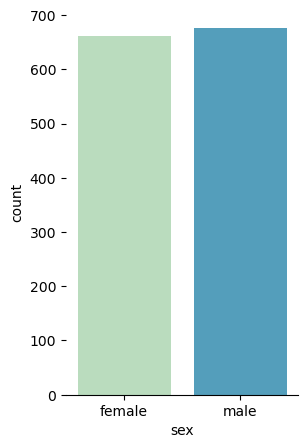

In [34]:
plt.figure(figsize=(3,5))
sns.countplot(x='sex',data=df,palette="GnBu")
sns.despine(left=True)

In [27]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [36]:
#relationship of smoking and genders with respect to the charges

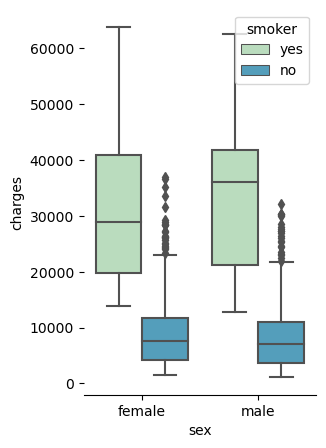

In [38]:
plt.figure(figsize=(3,5))
sns.boxplot(x='sex',y="charges",data=df,palette="GnBu",hue='smoker')
sns.despine(left=True)

<Axes: xlabel='age', ylabel='charges'>

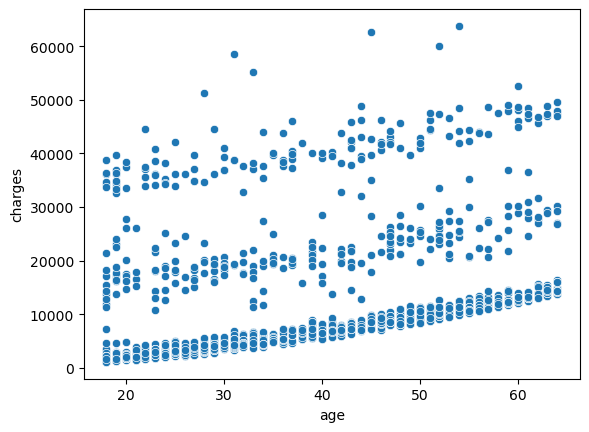

In [39]:
sns.scatterplot(x='age',y='charges',data=df)


<Axes: xlabel='age', ylabel='charges'>

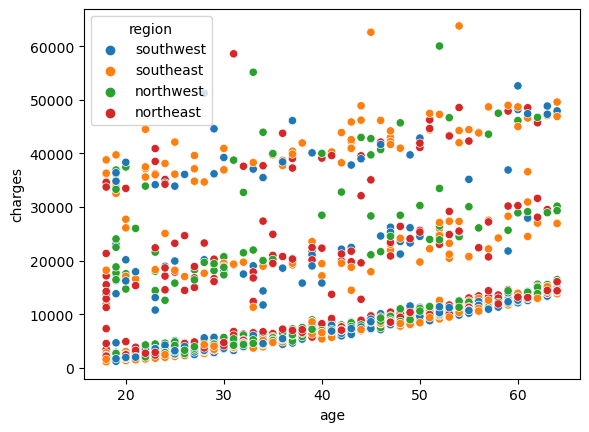

In [40]:
sns.scatterplot(x='age',y='charges',data=df,hue='region')


<Axes: xlabel='age', ylabel='charges'>

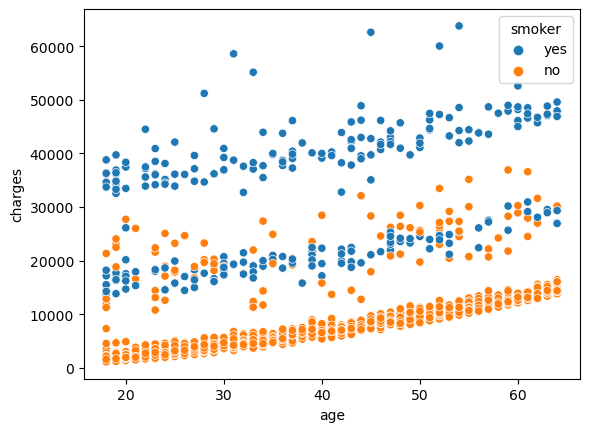

In [41]:
sns.scatterplot(x='age',y='charges',data=df,hue='smoker')


<Axes: xlabel='bmi', ylabel='charges'>

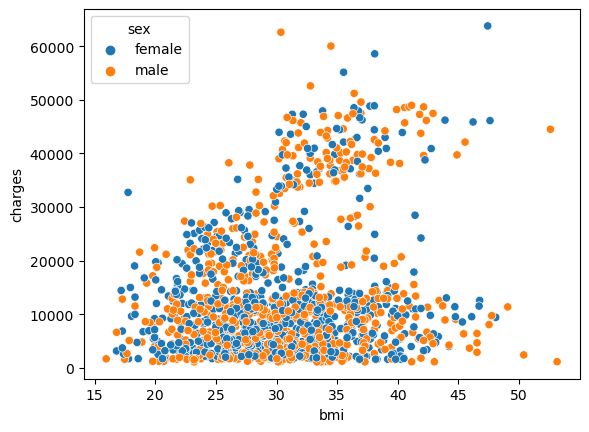

In [43]:
sns.scatterplot(x='bmi',y='charges',data=df,hue='sex')


<Axes: xlabel='bmi', ylabel='charges'>

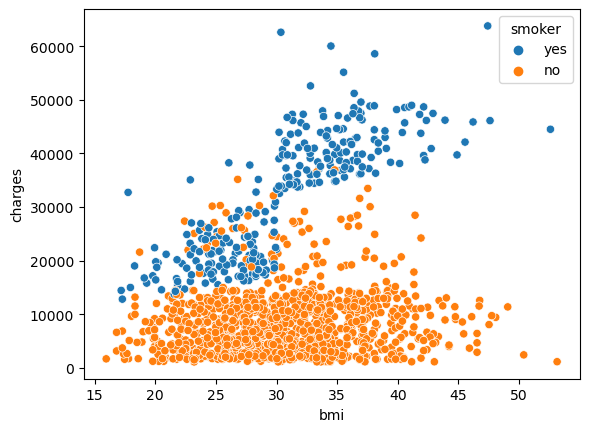

In [44]:
sns.scatterplot(x='bmi',y='charges',data=df,hue='smoker')


In [ ]:
#combine both the above scatterplot for comparision

<Axes: xlabel='bmi', ylabel='charges'>

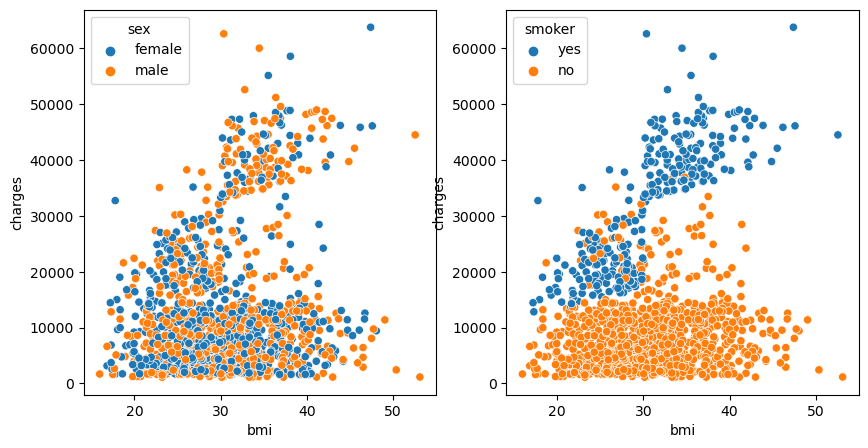

In [45]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.scatterplot(x='bmi',y='charges',data=df,hue='sex',ax=ax[0])
sns.scatterplot(x='bmi',y='charges',data=df,hue='smoker',ax=ax[1])

In [52]:
df.drop(['sex','region','smoker'],axis=1,inplace=True)

KeyError: "['sex', 'region', 'smoker'] not found in axis"

In [53]:
df.head()

,age,bmi,children,charges,male,yes
0,19,27.900,0,16884.92400,False,True
1,18,33.770,1,1725.55230,True,False
2,28,33.000,3,4449.46200,True,False
3,33,22.705,0,21984.47061,True,False
4,32,28.880,0,3866.85520,True,False


<Axes: >

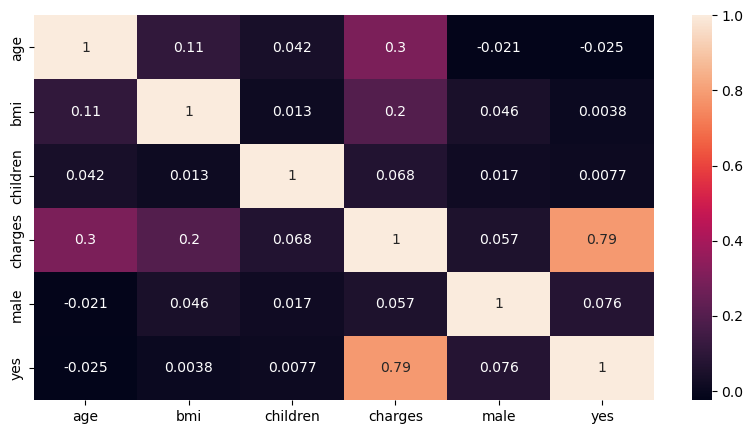

In [49]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

In [ ]:
#so from the above heatmap we can say that age,bmi are important parameters

In [50]:
df.corr()

,age,bmi,children,charges,male,yes
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251
male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185
yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000


In [56]:
x=df.drop('charges',axis=1)
y=df['charges']

In [58]:
x.head()

,age,bmi,children,male,yes
0,19,27.900,0,False,True
1,18,33.770,1,True,False
2,28,33.000,3,True,False
3,33,22.705,0,True,False
4,32,28.880,0,True,False


In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

In [61]:
x_train.shape

(802, 5)

In [62]:
x_test.shape

(536, 5)

In [63]:
df.head()

,age,bmi,children,charges,male,yes
0,19,27.900,0,16884.92400,False,True
1,18,33.770,1,1725.55230,True,False
2,28,33.000,3,4449.46200,True,False
3,33,22.705,0,21984.47061,True,False
4,32,28.880,0,3866.85520,True,False


In [ ]:
#Scaling the data

In [64]:
from sklearn.preprocessing import  StandardScaler
scaler=StandardScaler()

In [75]:
scaled_x_train=scaler.fit_transform(x_train)
scaled_x_test=scaler.transform(x_test)

In [66]:
scaled_x_train

array([[-0.2505678 , -0.28102336,  2.45816309, -0.97780241, -0.51088775],
       [ 0.59794189,  0.97492809, -0.06179447,  1.0227015 , -0.51088775],
       [ 1.51716073,  0.25559548,  0.77819138,  1.0227015 , -0.51088775],
       ...,
       [ 1.58786987,  0.40374178, -0.90178032, -0.97780241, -0.51088775],
       [-0.53340437,  2.21771099, -0.90178032, -0.97780241, -0.51088775],
       [ 0.59794189, -1.04150773, -0.90178032,  1.0227015 ,  1.95737715]])

Support Vector Regression Model

In [76]:
from sklearn.svm import SVR

regressor=SVR(kernel='sigmoid')
regressor.fit(scaled_x_train,y_train)

SVR(kernel='sigmoid')

In [77]:
predict=regressor.predict(scaled_x_test)

In [78]:
predict.shape

(536,)

In [79]:
y_test.shape

(536,)

In [80]:
predict[:10]  #predicted data

array([9374.97398218, 9327.95542033, 9482.37174267, 9351.08998348,
       9479.34571485, 9534.36808811, 9714.71300003, 9453.15474741,
       9551.71682499, 9411.05478154])

In [81]:
y_test[:10]   #actual data

282      4237.12655
1292     1515.34490
1222     8442.66700
37       2302.30000
1133     9991.03765
765     11842.62375
39      48173.36100
1272    14478.33015
144     20745.98910
955      3875.73410
Name: charges, dtype: float64